In [1]:
from spec_id import Gen_spec, Scale_model, Median_w_Error_cont, Iterative_stacking
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import grizli
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
lzDB = galDB.query('z_grism < 1.16')
mzDB = galDB.query('1.16 < z_grism < 1.3')
hzDB = galDB.query('1.3 < z_grism < 1.45')
uhzDB = galDB.query('1.45 < z_grism')


metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
dust=np.round(np.arange(0.0,1.1,0.1),1)
M,A=np.meshgrid(metal,age)

In [3]:
print(np.median(lzDB['SNR']))
print(np.median(mzDB['SNR']))
print(np.median(hzDB['SNR']))
print(np.median(uhzDB['SNR']))

8.578583538598942
9.29175838484961
5.559989823718639
3.0821039783673823


In [4]:
print((np.min(lzDB['z_grism']) + np.max(lzDB['z_grism'])) / 2)
print((np.min(mzDB['z_grism']) + np.max(mzDB['z_grism'])) / 2)
print((np.min(hzDB['z_grism']) + np.max(hzDB['z_grism'])) / 2)
print((np.min(uhzDB['z_grism']) + np.max(uhzDB['z_grism'])) / 2)

1.0815
1.2085
1.369
1.5590000000000002


In [5]:
print(np.min(lzDB['z_grism']))
print(np.max(uhzDB['z_grism']))

1.015
1.612


In [6]:
print(galDB['z_grism'][13])
print(galDB['z_grism'][20]) 
print(galDB['z_grism'][22]) 
print(galDB['z_grism'][26])

1.023
1.221
1.328
1.611


In [18]:
# spec1 = Gen_spec(galDB['gids'][220], 1.082, delayed=True,maxwv=11400)
# spec2 = Gen_spec(galDB['gids'][61], 1.217, delayed=True,maxwv=11400)
# spec3 = Gen_spec(galDB['gids'][232], 1.369, delayed=True,maxwv=11400)
# spec4 = Gen_spec(galDB['gids'][248], 1.636, delayed=True,maxwv=11400)

spec1 = Gen_spec(galDB['gids'][20], 1.082)
spec2 = Gen_spec(galDB['gids'][20], 1.209)
spec3 = Gen_spec(galDB['gids'][20], 1.369)
spec4 = Gen_spec(galDB['gids'][20], 1.560)

spec1.Sim_spec(0.019,2.2,8.0)
spec2.Sim_spec(0.019,2.2,8.0)
spec3.Sim_spec(0.019,2.2,8.0)
spec4.Sim_spec(0.019,2.2,8.0)


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

In [19]:
def Sig_int(er):
    sig = np.zeros(len(er)-1)
    
    for i in range(len(er)-1):
        sig[i] = np.sqrt(er[i]**2 + er[i+1]**2 )
    
    return np.sum((1/2)*sig)


def SNR(wv,fl,er):
    IDX = [U for U in range(len(wv)) if 7900 < wv[U] < 11100]
    return np.trapz(fl[IDX])/ Sig_int(er[IDX])

print(SNR(spec1.gal_wv,spec1.fl,spec1.o_er))
print(SNR(spec2.gal_wv,spec2.fl,spec2.o_er))
print(SNR(spec3.gal_wv,spec3.fl,spec3.o_er))
print(SNR(spec4.gal_wv,spec4.fl,spec4.o_er))




20.14515794022055
18.969690289289275
17.343945562550495
16.1620823597291


In [20]:
def SNR_correct(wave,flux,error,SNR_desired): 
    sno = SNR(wave,flux,error)
    return sno / SNR_desired

print(SNR_correct(spec1.gal_wv,spec1.fl,spec1.o_er,10))
print(SNR_correct(spec2.gal_wv,spec2.fl,spec2.o_er,10))
print(SNR_correct(spec3.gal_wv,spec3.fl,spec3.o_er,10))
print(SNR_correct(spec4.gal_wv,spec4.fl,spec4.o_er,10))

2.014515794022055
1.8969690289289276
1.7343945562550496
1.6162082359729102


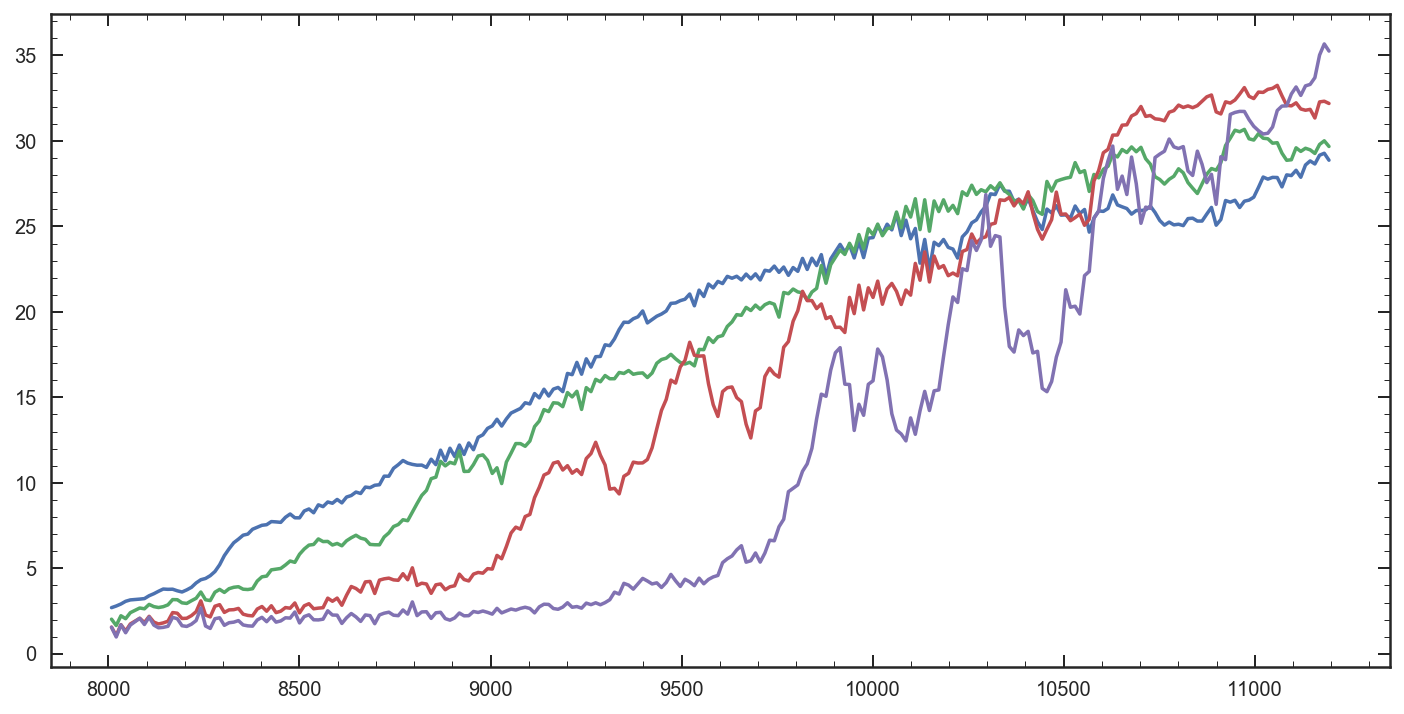

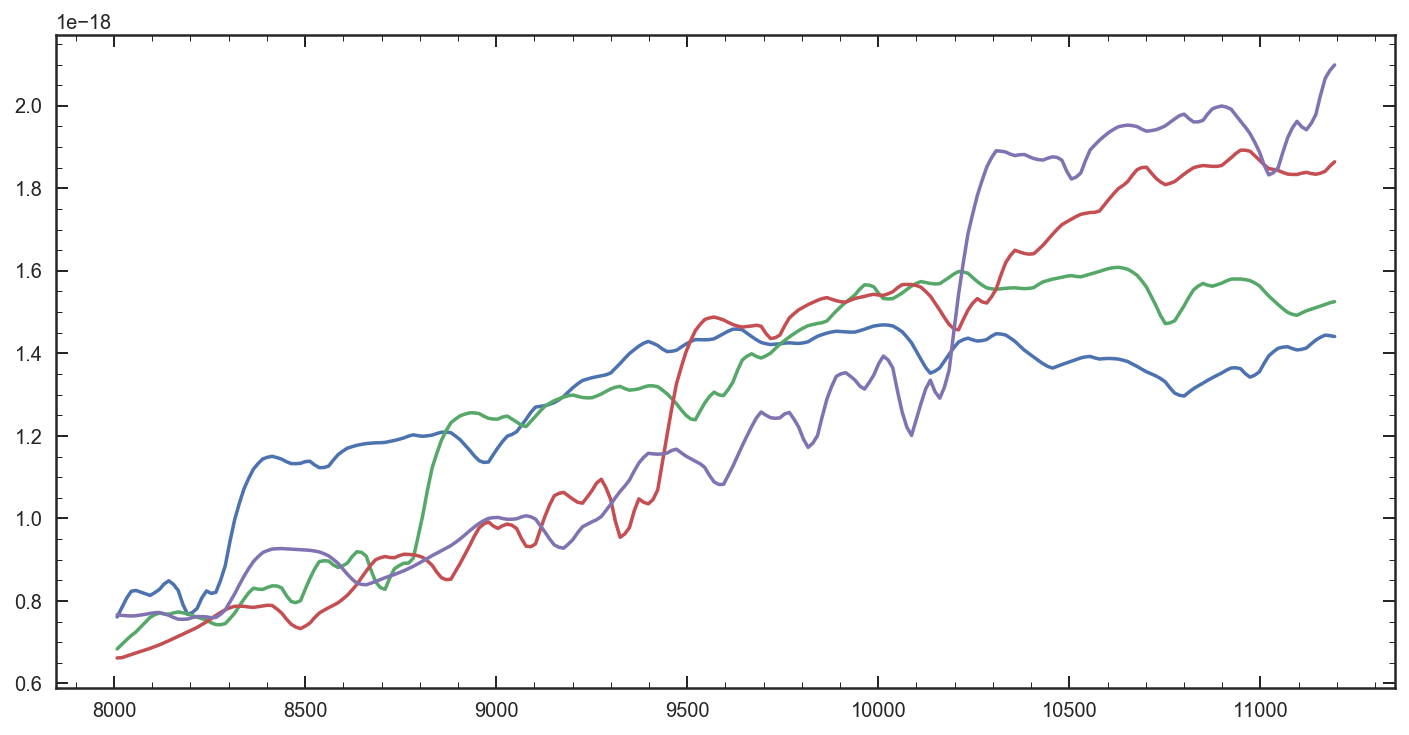

In [24]:
plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl/(spec1.gal_er ))
plt.plot(spec2.gal_wv,(spec2.fl)/(spec2.gal_er ))
plt.plot(spec3.gal_wv,(spec3.fl)/(spec3.gal_er ))
plt.plot(spec4.gal_wv,(spec4.fl)/(spec4.gal_er ))
# plt.axvspan(10500, 11400, alpha = 0.5)

plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl/2.014515794022055)
plt.plot(spec2.gal_wv,spec2.fl/ 1.8969690289289276)
plt.plot(spec3.gal_wv,spec3.fl/ 1.7343945562550496)
plt.plot(spec4.gal_wv,spec4.fl/ 1.6162082359729102)


<ErrorbarContainer object of 3 artists>

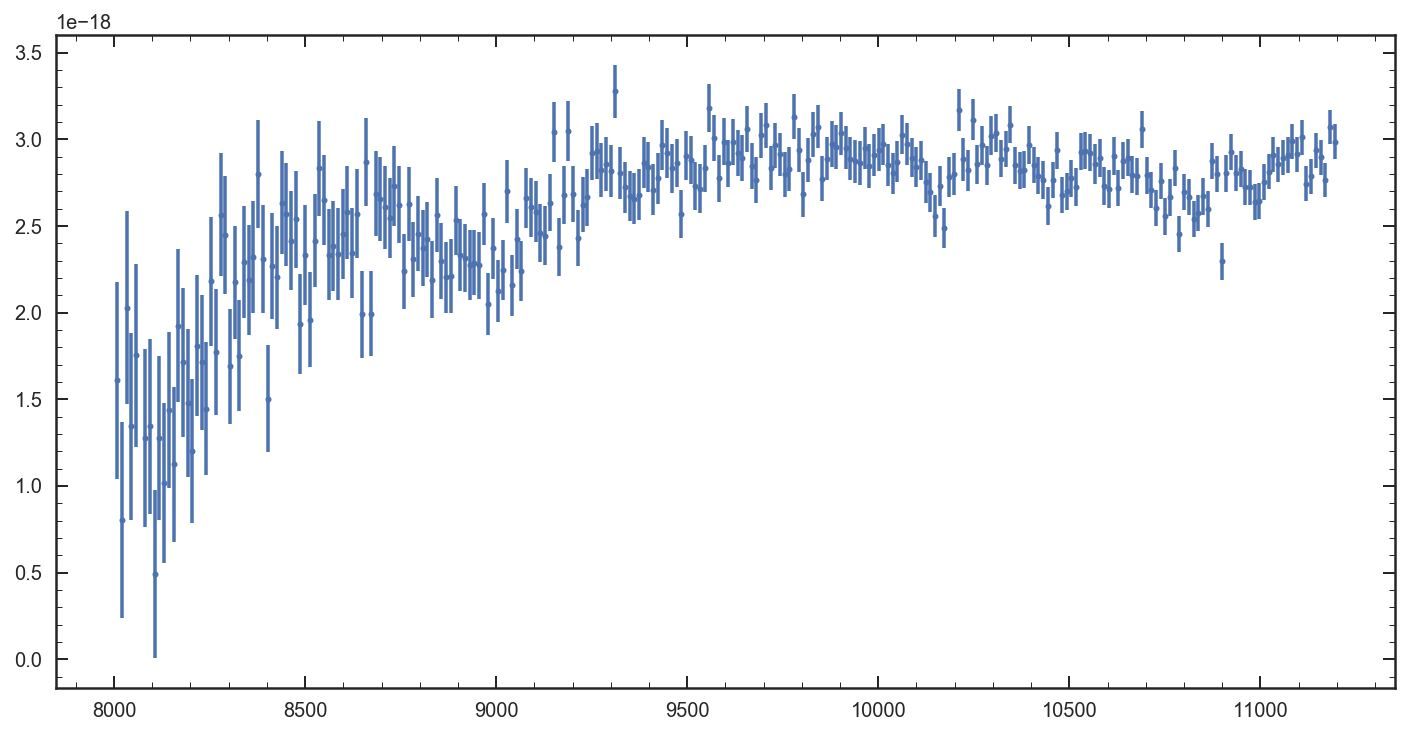

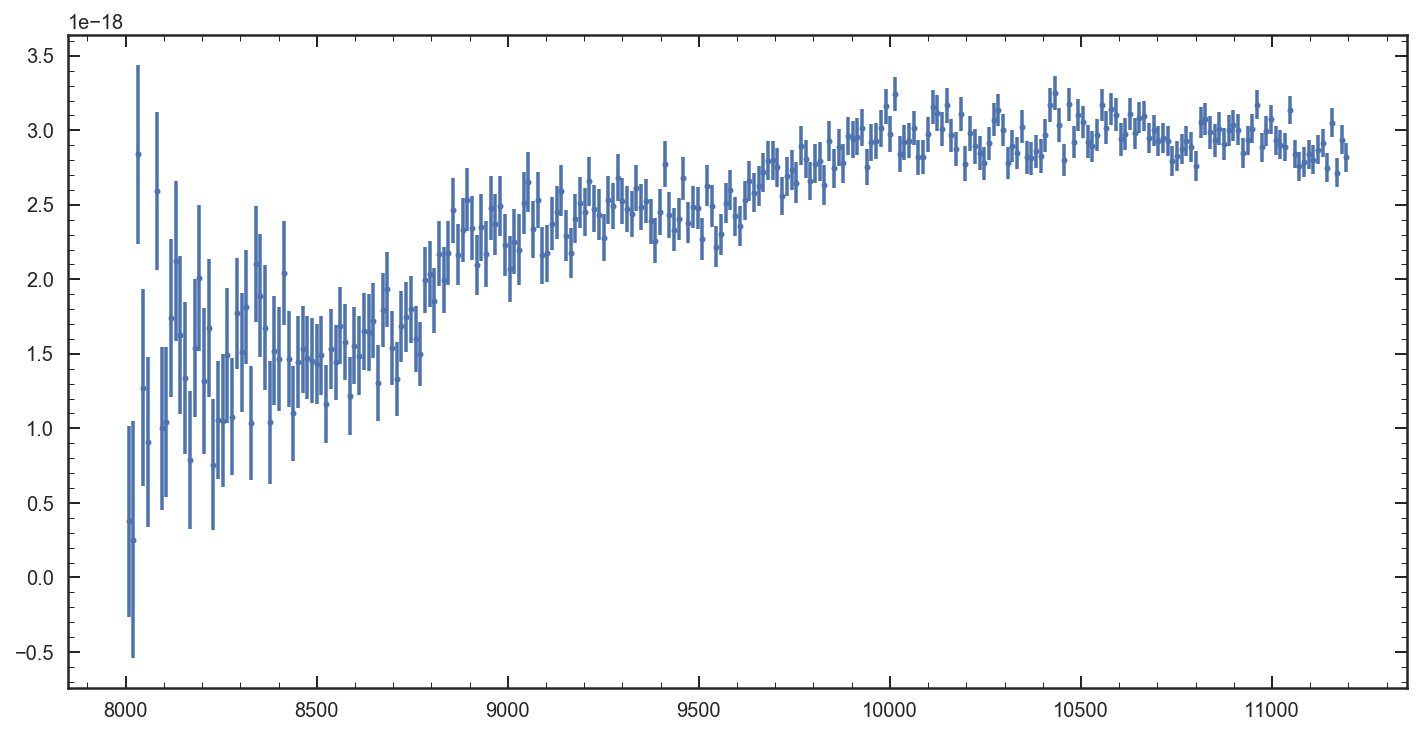

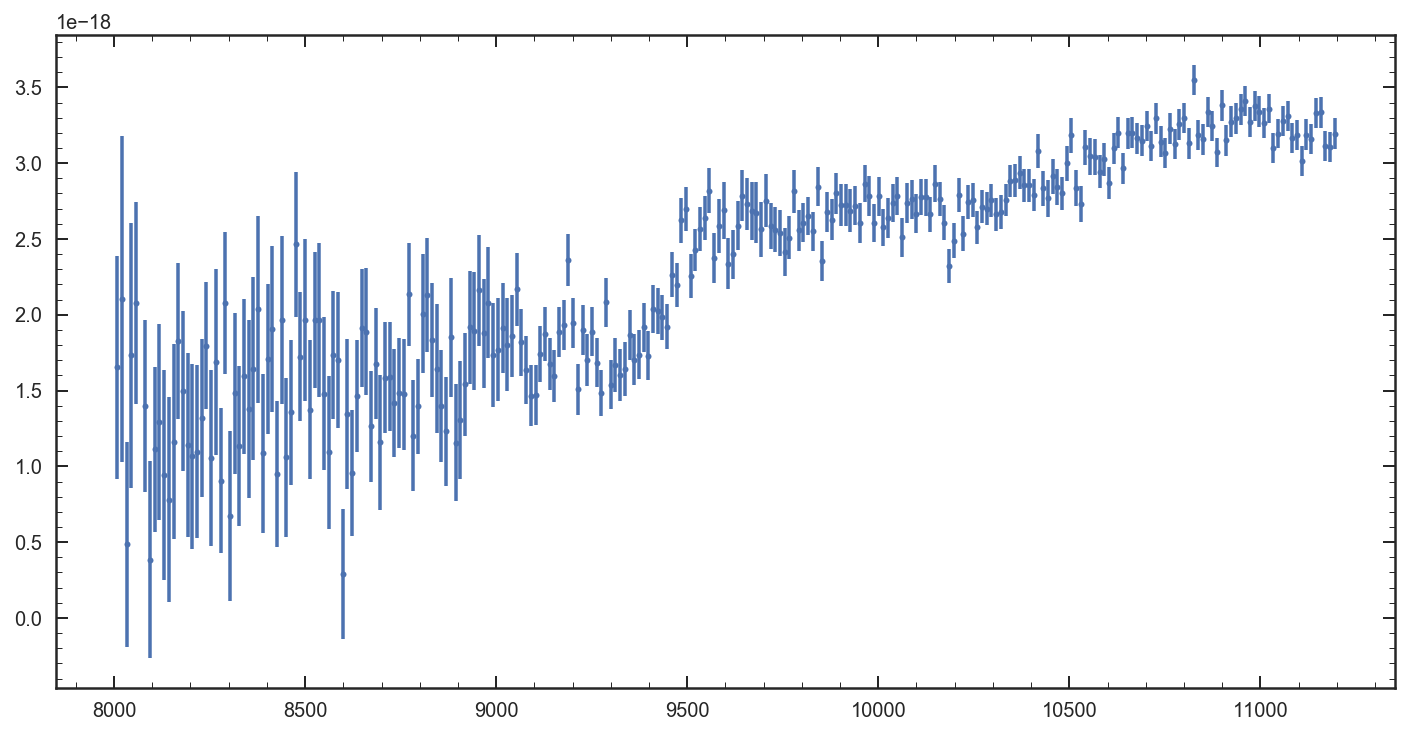

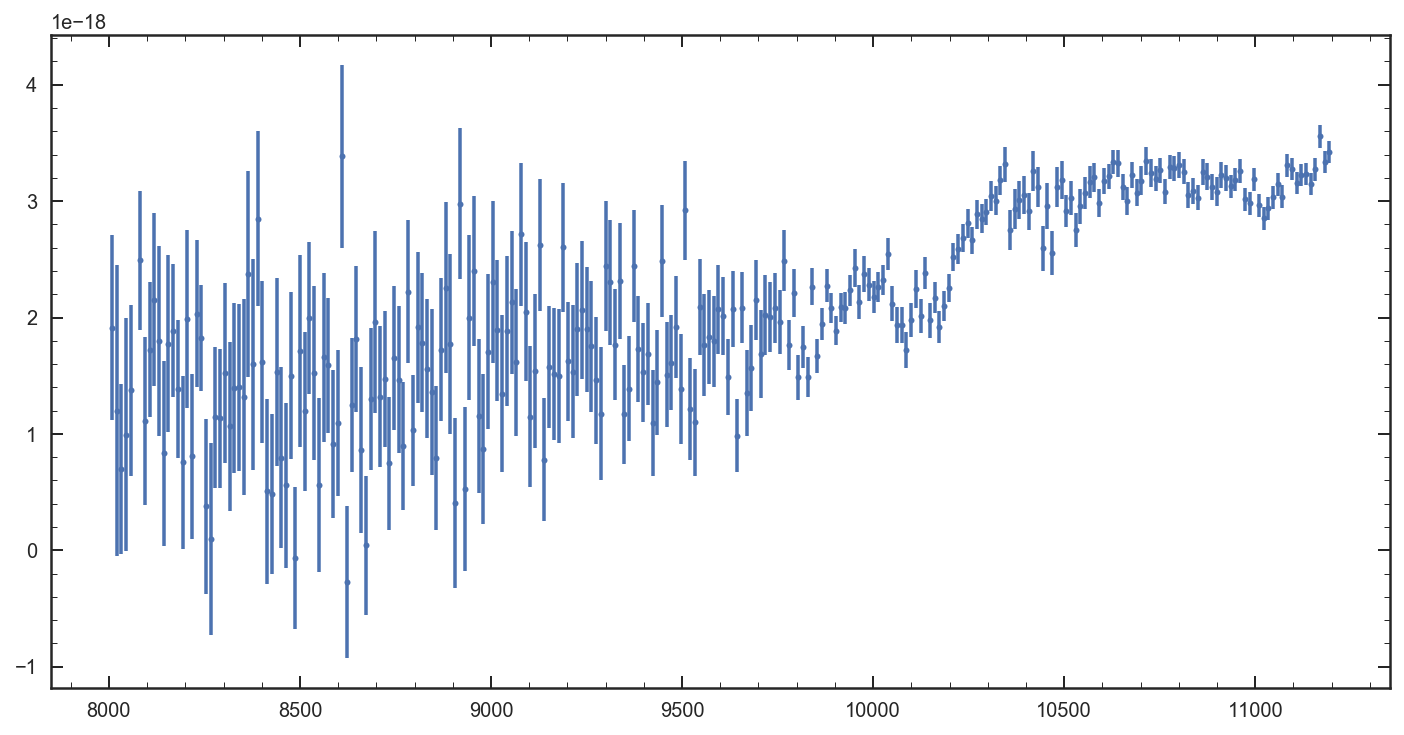

In [31]:
plt.figure(figsize=[12,6])
plt.errorbar(spec1.gal_wv,spec1.fl + np.random.normal(0,spec1.gal_er),spec1.gal_er, linestyle='None', marker='o', markersize=3)

plt.figure(figsize=[12,6])
plt.errorbar(spec2.gal_wv,spec2.fl + np.random.normal(0,spec2.gal_er),spec2.gal_er, linestyle='None', marker='o', markersize=3)

plt.figure(figsize=[12,6])
plt.errorbar(spec3.gal_wv,spec3.fl + np.random.normal(0,spec3.gal_er),spec3.gal_er, linestyle='None', marker='o', markersize=3)

plt.figure(figsize=[12,6])
plt.errorbar(spec4.gal_wv,spec4.fl + np.random.normal(0,spec4.gal_er),spec4.gal_er, linestyle='None', marker='o', markersize=3)


In [31]:
sn_array = [2,4,8,12,16]
m_array = [0.008,0.012,0.015,0.019,0.021,0.025]
a_array = [3.0,4.5,3.3,5.2,3.5,5.8]

for i in range(len(m_array)):
    spec1.Sim_spec(m_array[i],a_array[i],8.7)
    spec2.Sim_spec(m_array[i],a_array[i],8.7)
    spec3.Sim_spec(m_array[i],a_array[i],8.7)
    spec4.Sim_spec(m_array[i],a_array[i],8.7)
    for ii in range(len(sn_array)):
        C1 =SNR_correct(spec1.gal_wv,spec1.fl,spec1.gal_er,sn_array[ii])
        C2 =SNR_correct(spec2.gal_wv,spec2.fl,spec2.gal_er,sn_array[ii])
        C3 = SNR_correct(spec3.gal_wv,spec3.fl,spec3.gal_er,sn_array[ii])
        C4 = SNR_correct(spec4.gal_wv,spec4.fl,spec4.gal_er,sn_array[ii])
        
        slrm_text=["#!/bin/bash\n#SBATCH -J MC_fit-{0!s}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o mfit{0!s}-%j.out\n\
#SBATCH -e mfit{0!s}-%j.err\n\nchmod a+x C_MC_fit.py\n\n\
python C_MC_fit.py 's39170' 1.082 {1!s} {2!s} {3!s} {4!s} &\npython C_MC_fit.py 'n21156' 1.217 {1!s} {2!s} {3!s} {5!s} &\n\
python C_MC_fit.py 's40862' 1.369 {1!s} {2!s} {3!s} {6!s} &\n\
python C_MC_fit.py 's44042' 1.636 {1!s} {2!s} {3!s} {7!s} &\n\
\nwait\n\nexit 0".format(i*len(sn_array) + ii +1, m_array[i],a_array[i],sn_array[ii],C1,C2,C3,C4)]
        
        np.savetxt('../mcerr/MC_fit_{0!s}.slrm'.format(i*len(sn_array) + ii +1),slrm_text,fmt='%s')

# Rework MC fit

In [164]:
def MC_fit(galaxy, metal, age, tau, redshift, dust, sim_m, sim_a, sim_t, sim_z, sim_d, sn, dataset, specz, name, repeats=1000,
    age_conv='/fdata/scratch/vestrada78840/data/light_weight_scaling.npy'):
    
    ######## set paramter output arrays
    PZlist = np.zeros([repeats,metal.size])
    Ptlist = np.zeros([repeats,age.size])
    mlist = np.zeros(repeats)
    alist = np.zeros(repeats)

    ultau = np.append(0, np.power(10, np.array(tau[1:]) - 9))
    
    ######## create sim
    spec = Gen_sim(galaxy, sim_m, sim_a, sim_t, sim_z, sim_d, sn)

    ####### set up lwa
    convtable = np.load(age_conv)

    overhead = np.zeros([len(tau),metal.size]).astype(int)
    for i in range(len(tau)):
        for ii in range(metal.size):
            amt=[]
            for iii in range(age.size):
                if age[iii] > convtable.T[i].T[ii][-1]:
                    amt.append(1)
            overhead[i][ii] = sum(amt)

    ####### Generate model grid
    mflgrid = Gen_mflgrid(spec.gal_wv, spec.filt, metal, dataset, specz)
         
    ####### Generate dust minigrid
    dstgrid = Gen_dust_minigrid(spec.gal_wv,redshift)
        
    for xx in range(repeats):
        spec.Perturb_flux()

        chi = np.sum(((spec.flx_err - mfl) / spec.gal_er) ** 2, axis=1).reshape(
            [len(metal), len(age), len(tau)]).astype(np.float128).T

        ######## Reshape likelihood to get average age instead of age when marginalized
        newchi = np.zeros(chi.shape)

        for i in range(len(chi)):
            frame = np.zeros([metal.size, age.size])
            for ii in range(metal.size):
                dist = interp1d(convtable.T[i].T[ii], chi[i].T[ii])(age[:-overhead[i][ii]])
                frame[ii] = np.append(dist, np.repeat(1E5, overhead[i][ii]))
            newchi[i] = frame.T

        ####### Create normalize probablity marginalized over tau
        prob = np.exp(-newchi.T.astype(np.float128) / 2)

        P = np.trapz(prob, ultau, axis=2)
        C = np.trapz(np.trapz(P, age, axis=1), metal)

        #### Get Z and t posteriors
        PZ = np.trapz(P / C, age, axis=1)
        Pt = np.trapz(P.T / C, metal, axis=1)

        PZlist[xx] = PZ
        Ptlist[xx] = Pt
        
        mlist[xx],ml,mh = Median_w_Error_cont(PZ,metal)
        alist[xx],ml,mh = Median_w_Error_cont(Pt,age)

    np.save('/home/vestrada78840/mcerr/PZ_' + name, PZlist)
    np.save('/home/vestrada78840/mcerr/Pt_' + name, Ptlist)
    np.save('/home/vestrada78840/mcerr/' + name, [mlist, alist])

    return

In [60]:
def Sig_int(er):
    sig = np.zeros(len(er)-1)
    
    for i in range(len(er)-1):
        sig[i] = np.sqrt(er[i]**2 + er[i+1]**2 )
    
    return np.sum((1/2)*sig)


def SNR(wv,fl,er):
    IDX = [U for U in range(len(wv)) if 7900 < wv[U] < 11200]
    return np.trapz(fl[IDX])/ Sig_int(er[IDX])

def SNR_correct(wave,flux,error,SNR_desired): 
    sno = SNR(wave,flux,error)
    return sno / SNR_desired

class Gen_sim(object):
    def __init__(self, galaxy_id, sim_metal, sim_age, sim_tau, sim_z, sim_dust, sn, minwv = 7900, maxwv = 11200, shift = 1):
        self.galaxy_id = galaxy_id
        self.gid = int(self.galaxy_id[1:])
        self.sim_metal = sim_metal
        self.sim_age = sim_age
        self.sim_tau = sim_tau
        self.sn = sn
        self.sim_z = sim_z
        self.sim_dust = sim_dust
        self.shift = shift
        
        gal_wv, gal_fl, gal_er = np.load(glob('../spec_stacks/*{0}*'.format(self.gid))[0])
        self.flt_input = glob('../beams/*{0}*'.format(self.gid))[0]

        IDX = [U for U in range(len(gal_wv)) if minwv <= gal_wv[U] <= maxwv]

        self.gal_wv_rf = gal_wv[IDX] / (1 + self.sim_z)
        self.gal_wv = gal_wv[IDX]
        self.gal_fl = gal_fl[IDX]
        self.gal_er = gal_er[IDX]

        self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0 ]
        self.gal_wv = self.gal_wv[self.gal_fl > 0 ]
        self.gal_er = self.gal_er[self.gal_fl > 0 ]
        self.gal_fl = self.gal_fl[self.gal_fl > 0 ]
        self.o_er = np.array(self.gal_er)
       
        WV,TEF = np.load('../data/template_error_function.npy')
        iTEF = interp1d(WV,TEF)(self.gal_wv_rf)
        self.gal_er = np.sqrt(self.gal_er**2 + (iTEF*self.gal_fl)**2)

        snc = SNR_correct(self.gal_wv, self.gal_fl, self.o_er, self.sn)

        self.gal_fl /= snc
        
        ## Spectrum cutouts
        self.beam = grizli.model.BeamCutout(fits_file=self.flt_input)

        ## Get sensitivity function

        flat = self.beam.flat_flam.reshape(self.beam.beam.sh_beam)
        fwv, ffl, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,flat.shape[0]]),flat.T[:-1],axis=0).T , bin=0)
        
        self.filt = interp1d(fwv, ffl)(self.gal_wv)

        ## set mask for continuum removal
        m2r = [3175, 3280, 3340, 3515, 3550, 3650, 3710, 3770, 3800, 3850,
               3910, 4030, 4080, 4125, 4250, 4385, 4515, 4570, 4810, 4910, 4975, 5055, 5110, 5285]

        Mask = np.zeros(len(self.gal_wv_rf))
        for i in range(len(Mask)):
            if m2r[0] <= self.gal_wv_rf[i] <= m2r[1]:
                Mask[i] = 1
            if m2r[2] <= self.gal_wv_rf[i] <= m2r[3]:
                Mask[i] = 1
            if m2r[4] <= self.gal_wv_rf[i] <= m2r[5]:
                Mask[i] = 1
            if m2r[6] <= self.gal_wv_rf[i] <= m2r[7]:
                Mask[i] = 1
            if m2r[8] <= self.gal_wv_rf[i] <= m2r[9]:
                Mask[i] = 1
            if m2r[8] <= self.gal_wv_rf[i] <= m2r[9]:
                Mask[i] = 1
            if m2r[10] < self.gal_wv_rf[i] <= m2r[11]:
                Mask[i] = 1
            if m2r[12] <= self.gal_wv_rf[i] <= m2r[13]:
                Mask[i] = 1
            if m2r[14] <= self.gal_wv_rf[i] <= m2r[15]:
                Mask[i] = 1
            if m2r[16] <= self.gal_wv_rf[i] <= m2r[17]:
                Mask[i] = 1
            if m2r[18] <= self.gal_wv_rf[i] <= m2r[19]:
                Mask[i] = 1
            if m2r[20] <= self.gal_wv_rf[i] <= m2r[21]:
                Mask[i] = 1
            if m2r[22] <= self.gal_wv_rf[i] <= m2r[23]:
                Mask[i] = 1
        
        self.maskw = np.ma.masked_array(self.gal_wv_rf, Mask)
        params = np.ma.polyfit(self.maskw, self.gal_fl, 3)
        C0 = np.polyval(params,self.gal_wv_rf)

        self.nc_gal_fl = self.gal_fl / C0
        self.nc_gal_er = self.gal_er / C0
        self.nc_o_er = self.o_er / C0
                        
        self.Set_spec()
        self.Set_spec_nc()
    
    
    def Set_spec(self):
        model = '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
            self.sim_metal, self.sim_age, self.sim_tau)
        
        wave, fl = np.load(model)

        cal = 1
        if self.sim_dust !=0:
            lam = wave * 1E-4
            Rv = 4.05
            k = 2.659*(-2.156 +1.509/(lam) -0.198/(lam**2) +0.011/(lam**3)) + Rv
            cal = 10**(-0.4 * k * dust / Rv)  
        
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+self.sim_z),fl * cal])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),
                                                           self.beam.model.T[:-1],axis=0).T , bin=0)

        ifl = interp1d(w, f)(self.gal_wv)
        adj_ifl = ifl /self.filt
        
        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl        
        self.Perturb_flux()
        
    def Set_spec_nc(self):
        model = '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
            self.sim_metal, self.sim_age, self.sim_tau)

        wave, fl = np.load(model)

        cal = 1
        if self.sim_dust !=0:
            lam = wave * 1E-4
            Rv = 4.05
            k = 2.659*(-2.156 +1.509/(lam) -0.198/(lam**2) +0.011/(lam**3)) + Rv
            cal = 10**(-0.4 * k * dust / Rv)  
        
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+self.sim_z),fl * cal])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),
                                                           self.beam.model.T[:-1],axis=0).T , bin=0)

        ifl = interp1d(w, f)(self.gal_wv)
        adj_ifl = ifl /self.filt
        
        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl 
        
        params = np.ma.polyfit(self.maskw, self.fl, 3)
        C0 = np.polyval(params,self.gal_wv_rf)

        self.nc_fl = self.fl / C0
       
        self.Perturb_flux_nc()
    
    def Perturb_flux(self):
        self.flx_err = np.abs(self.fl + np.random.normal(0, self.gal_er))


    def Perturb_flux_nc(self):
        self.nc_flx_err = np.abs(self.nc_fl + np.random.normal(0, self.nc_gal_er))


    def Sim_spec(self, metal, age, tau, model_redshift = 0, dust = 0):
        if model_redshift ==0:
            model_redshift = self.sim_z
            
        model = '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(metal, age, tau)

        wave, fl = np.load(model)

        cal = 1
        if dust !=0:
            lam = wave * 1E-4
            Rv = 4.05
            k = 2.659*(-2.156 +1.509/(lam) -0.198/(lam**2) +0.011/(lam**3)) + Rv
            cal = 10**(-0.4 * k * dust / Rv)  
        
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift),fl * cal])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),
                                                           self.beam.model.T[:-1],axis=0).T , bin=0)

        ifl = interp1d(w, f)(self.gal_wv)
        adj_ifl = ifl /self.filt
        
        C = Scale_model(self.flx_err, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl
        
    def Sim_spec_mult(self, wave, fl, model_redshift = 0):
        if model_redshift ==0:
            model_redshift = self.redshift

        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift), fl])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),
                                                           self.beam.model.T[:-1],axis=0).T , bin=0)

        self.fl = f
        self.mwv = w
       
    def Sim_spec_nc(self, metal, age, tau, model_redshift = 0, dust = 0):
        if model_redshift ==0:
            model_redshift = self.sim_z
            
        model = '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(metal, age, tau)

        wave, fl = np.load(model)

        cal = 1
        if dust !=0:
            lam = wave * 1E-4
            Rv = 4.05
            k = 2.659*(-2.156 +1.509/(lam) -0.198/(lam**2) +0.011/(lam**3)) + Rv
            cal = 10**(-0.4 * k * dust / Rv)  
        
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift),fl * cal])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),
                                                           self.beam.model.T[:-1],axis=0).T , bin=0)

        ifl = interp1d(w, f)(self.gal_wv)
        adj_ifl = ifl /self.filt
        
        C = Scale_model(self.fl_err, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl
        
        params = np.ma.polyfit(self.maskw, self.fl, 3)
        C0 = np.polyval(params,self.gal_wv_rf)

        self.nc_fl = self.fl / C0

In [ ]:
def Galaxy_full_analyze(fit_wv, fit_flat, metal, age, tau, rshift, specz, galaxy, dataset, name, minwv = 7900, maxwv = 11200):
    
    Redden_and_fit(galaxy, name, metal, specz, rshift,minwv, maxwv)
    grids = ['/fdata/scratch/vestrada78840/chidat/{0}_d{1}_chidata.npy'.format(name,U) for U in range(11)]
    
    P, PZ, Pt, Ptau, Pz, Pd = Analyze_full_fit(grids, metal, age, tau, rshift)
    
def Stich_spec(grids):
    stc = []
    for i in range(len(grids)):
        stc.append(np.load(grids[i]))
        
    stc = np.array(stc)
    return stc.reshape([stc.shape[0] * stc.shape[1],stc.shape[2]])

def Gen_mflgrid(fit_wv, fit_flat, metal, dataset, specz, minwv, maxwv)
    ##### set model wave
    tmp_spec = Gen_spec(dataset, specz, minwv = minwv, maxwv = maxwv)
    
    #############Read in spectra#################    
    files = ['/fdata/scratch/vestrada78840/chidat/spec_files/{0}_m{1}.npy'.format(dataset,U) for U in metal]
    mfl = Stich_spec(files)
    mfl = np.ma.masked_invalid(mfl)
    mfl.data[mfl.mask] = 0
    mfl = interp2d(tmp_spec.mwv, range(len(mfl.data)),mfl.data)(fit_wv,range(len(mfl.data)))
    return mfl / fit_flat

def Gen_dust_minigrid(fit_wv,rshift)
    dust_dict = {}
    Av = np.round(np.arange(0, 1.1, 0.1),1)
    
    for i in range(len(Av)):
        key = str(Av[i])
        minigrid = np.zeros([len(rshift),len(fit_wv)])
        
        for ii in range(len(rshift))
            minigrid[ii] = Calzetti(Av[i],fit_wv / (1 + rshift[ii]))
        
        dust_dict[key] = minigrid
            
    return dust_dict
            
def Redden_and_fit(mfl, dustgrid, fit_wv, fit_fl, fit_er, fit_flat, metal, age, tau, rshift, name, dataset):
    Av = np.round(np.arange(0, 1.1, 0.1),1)
    
    for i in range(len(Av)):
        dustgrid = np.repeat([dust[str(Av)]], len(metal)*len(age)*len(tau), axis=0).reshape(
            [len(dust[str(Av)])*len(metal)*len(age)*len(tau), len(dust[str(Av)])])
        redflgrid = mfl * dustgrid
        SCL = Scale_model_mult(fit_fl,fit_er,redflgrid)
        redflgrid = np.array([SCL]).T*redflgrid
        chigrid = np.sum(((fit_fl - redflgrid) / fit_er) ** 2, axis=1).reshape([len(metal), len(age), len(tau), len(rshift)])
        np.save('/fdata/scratch/vestrada78840/chidat/{0}_d{1}_chidata'.format(name, i),chigrid)
        
def Stich_grids(grids):
    stc = []
    for i in range(len(grids)):
        stc.append(np.load(grids[i]))
    return np.array(stc)

def Analyze_full_fit(chifiles, metal, age, tau, rshift, dust = np.arange(0,1.1,0.1), age_conv='/fdata/scratch/vestrada78840/data/light_weight_scaling_3.npy'):
    ####### Get maximum age
    max_age = Oldest_galaxy(max(rshift))
    
    ####### Read in file   
    chi = Stich_grids(chifiles)
    
    chi[ : , : , len(age[age <= max_age]):] = 1E5

    ####### Get scaling factor for tau reshaping
    ultau = np.append(0, np.power(10, np.array(tau)[1:] - 9))
    
    convtable = np.load(age_conv)

    overhead = np.zeros([len(tau),metal.size]).astype(int)
    for i in range(len(tau)):
        for ii in range(metal.size):
            amt=[]
            for iii in range(age.size):
                if age[iii] > convtable.T[i].T[ii][-1]:
                    amt.append(1)
            overhead[i][ii] = sum(amt)

    ######## get Pd and Pz
    P_full = np.exp(- chi / 2).astype(np.float128)
    Pd = np.trapz(np.trapz(np.trapz(np.trapz(P_full, rshift, axis=4), ultau, axis=3), age, axis=2), metal, axis=1) /\
        np.trapz(np.trapz(np.trapz(np.trapz(np.trapz(P_full, rshift, axis=4), ultau, axis=3), age, axis=2), metal, axis=1),dust)

    Pz = np.trapz(np.trapz(np.trapz(np.trapz(P_full.T, dust, axis=4), metal, axis=3), age, axis=2), ultau, axis=1) /\
        np.trapz(np.trapz(np.trapz(np.trapz(np.trapz(P_full.T, dust, axis=4), metal, axis=3), age, axis=2), ultau, axis=1),rshift)

    P = np.trapz(P_full, rshift, axis=4)
    P = np.trapz(P.T, dust, axis=3).T
    new_P = np.zeros(P.T.shape)

    ######## Reshape likelihood to get light weighted age instead of age when marginalized
    for i in range(len(tau)):
        frame = np.zeros([metal.size,age.size])
        for ii in range(metal.size):
            dist = interp1d(convtable.T[i].T[ii],P.T[i].T[ii])(age[:-overhead[i][ii]])
            frame[ii] = np.append(dist,np.repeat(0, overhead[i][ii]))
        new_P[i] = frame.T

    ####### Create normalize probablity marginalized over tau
    P = new_P.T

    # test_prob = np.trapz(test_P, ultau, axis=2)
    C = np.trapz(np.trapz(np.trapz(P, ultau, axis=2), age, axis=1), metal)

    P /= C

    prob = np.trapz(P, ultau, axis=2)
    
    # #### Get Z, t, tau, and z posteriors
    PZ = np.trapz(np.trapz(P, ultau, axis=2), age, axis=1)
    Pt = np.trapz(np.trapz(P, ultau, axis=2).T, metal, axis=1)
    Ptau = np.trapz(np.trapz(P.T, metal, axis=2), age, axis=1)

    return prob.T, PZ, Pt, Ptau, Pz, Pd

In [61]:
spec = Gen_sim('s39170', 0.019, 4.2, 8.7, 1.082, 0,10)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

In [63]:
x =np.array([[1,2,3],[4,5,6],[7,8,9]])

In [76]:
np.repeat([x],10, axis=0).reshape([len(x)*10,len(x)])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

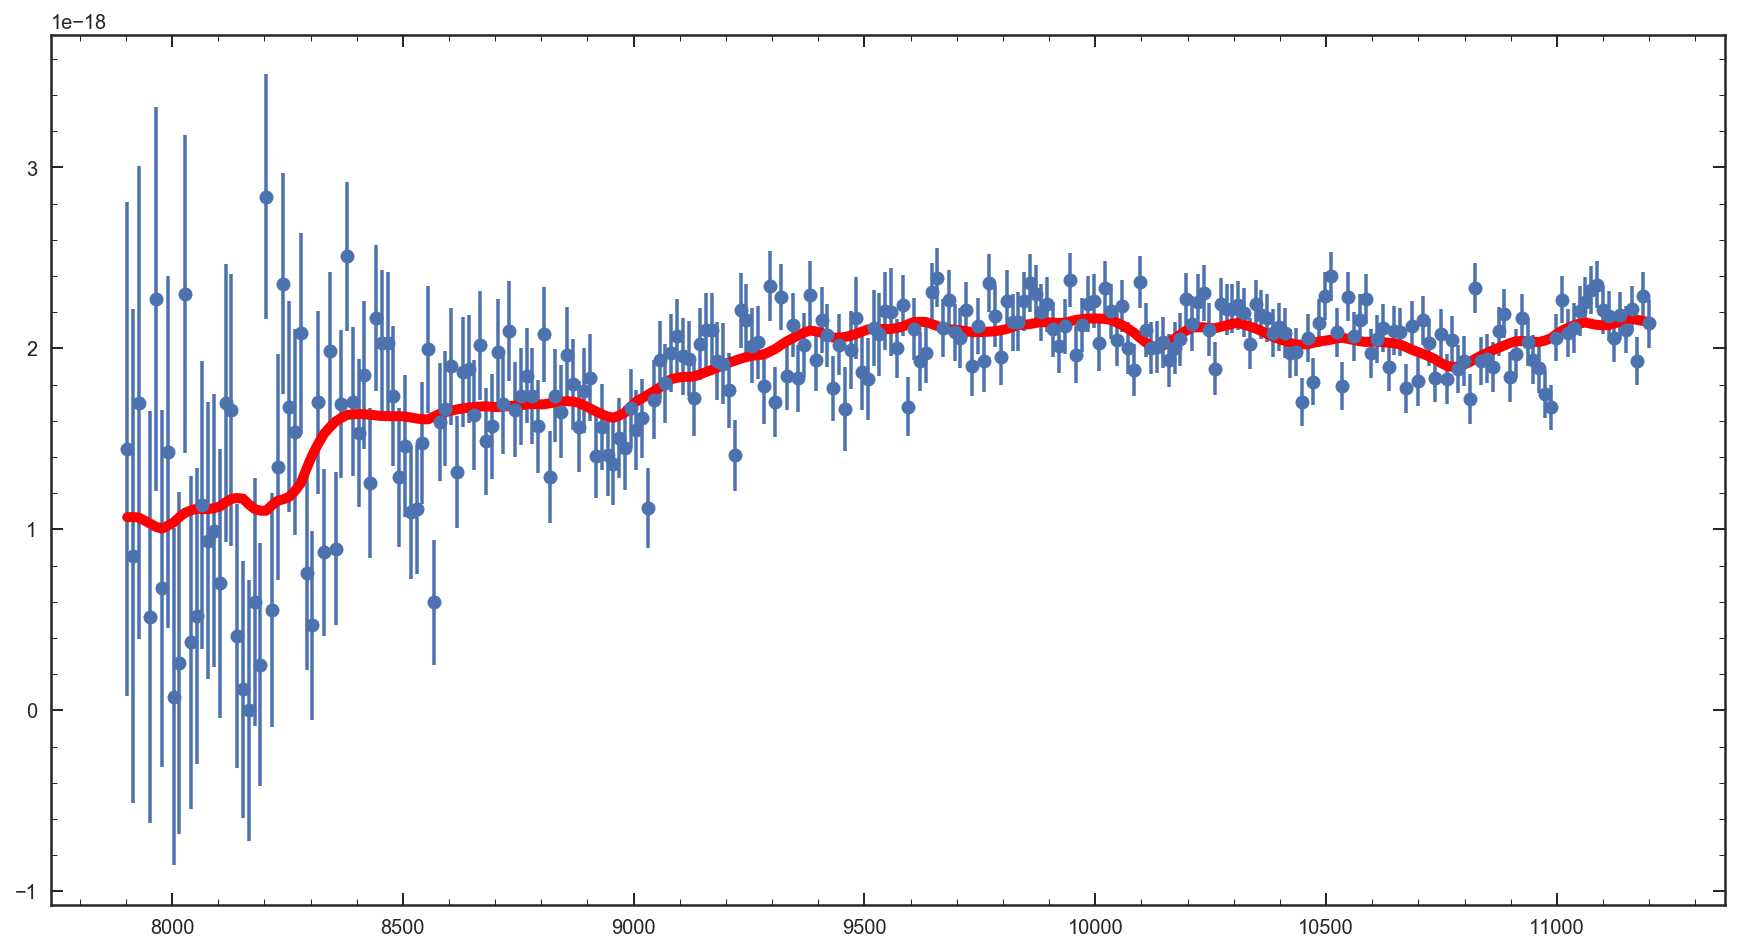

In [62]:
plt.figure(figsize=[15,8])
plt.errorbar(spec.gal_wv,spec.flx_err,spec.gal_er,fmt = 'o')
plt.plot(spec.gal_wv,spec.fl,'r',linewidth=5)

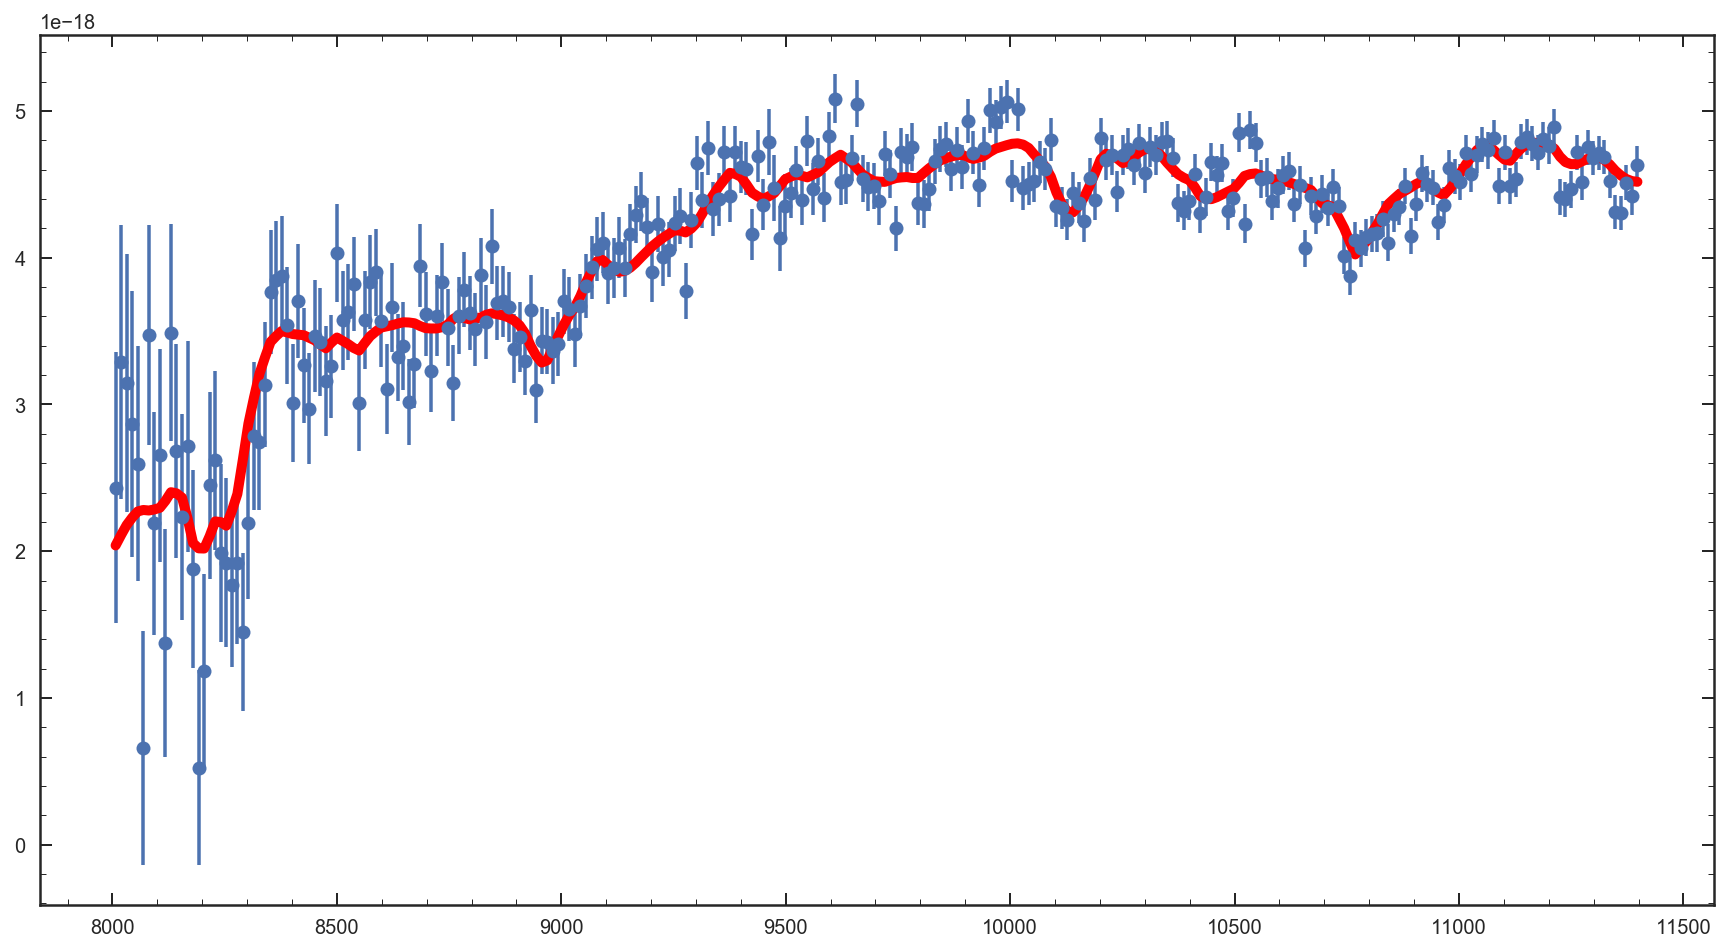

In [17]:
plt.figure(figsize=[15,8])
plt.errorbar(spec.gal_wv,spec.flx_err,spec.gal_er,fmt = 'o')
plt.plot(spec.gal_wv,spec.fl,'r',linewidth=5)